# Intro
Name:  

    Explore_cld_retrieval

Purpose:  

    Run throught the retrieved cloud properties and either flag or assure retrieval quality
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - plotting_utils (user defined plotting routines)
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - 4STAR_cloud retrieval .mat files
  
 Modification History:
 
     Written: by Samuel LeBlanc, NASA Ames, Moffett Field, CA, 2016-10-26

# Import of modules

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
%matplotlib notebook
import numpy as np
import scipy.io as sio
import hdf5storage as hs
import Sp_parameters as Sp
from path_utils import getpath

In [2]:
# set the basic directory path
fp = getpath('starzen_2017',make_path=True,path=os.path.join(getpath('ORACLES',make_path=True),'starzen_2017'))
#fp = 'C:/Users/sleblan2/Research/ORACLES/starzen_2017/'
#fp_plot = 'C:/Users/sleblan2/Research/ORACLES/starzen_2017/plot/'
fp_plot = fp+'plot/'

In [3]:
vr = 'R0'

# Load the files

In [4]:
dds = ['20170807','20170809','20170812','20170813','20170815','20170817',
       '20170818','20170819','20170821','20170824','20170826','20170828','20170830','20170831','20170902']

In [6]:
dds = ['20170809','20170812','20170813','20170815','20170817','20170818']

In [6]:
rts = []
sps = []

In [7]:
for daystr in dds:
    print daystr
    rt = hs.loadmat(fp+'{}_zen_cld_retrieved.mat'.format(daystr))
    s = sio.loadmat(fp+'4STAR_{}starzen.mat'.format(daystr))
    sp = Sp.Sp(s)
    rts.append(rt)
    sps.append(sp)

20170807
1556 1556
in rads
(129, 1556) 2 1556
1 in ui
(129, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20170809
1556 1556
in rads
(1247, 1556) 2 1556
1 in ui
(1247, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20170812
1556 1556
in rads
(412, 1556) 2 1556
1 in ui
(412, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20170813
1556 1556
in rads
(1211, 1556) 2 1556
1 in ui
(1211, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20170815
1556 1556
in rads
(455, 1556) 2 1556
1 in ui
(455, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20170817
1556 1556
in rads
(703, 1556) 2 1556
1 in ui
(703, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0
20170818
1556 1556
in rads
(349, 1556) 2 1

## Load the cloud probe info

In [8]:
from load_utils import mat2py_time,toutc, load_ict

In [9]:
ff = getpath('ORACLES')

In [13]:
cloud,cdp = [],[]
cloud_head,cdp_head = [],[]
for i,d in enumerate(dds):
    try:
        print 'Doing day: {}'.format(d)
        fname_cld = ff+'data_other_2017/UND-Summary_P3_{}_{vv}.ict'.format(d,vv='R0')
        tt,th = load_ict(fname_cld,return_header=True)
    except:
        print '*** Problem with day: {} *** Skipping '.format(d)
        #continue
        tt,th = np.NaN,np.NaN
    cloud.append(tt)
    cloud_head.append(th)

Doing day: 20170807
('Start_UTC', 'Sys_Temp', 'Sys_DewTemp', 'Sys_TTemp', 'Sys_SPress', 'CIP_AirTemp', 'CIP_SPress', 'CIP_PPress', 'CIP_TAS', 'Sys_TAS', 'Sys_IAS', 'Sys_GPSAlt', 'Sys_PresAlt', 'SysRadarAlt', 'SysTrueHead', 'SysTrackAng', 'SysDriftAng', 'SysPitchAng', 'Sys_RollAng', 'SPP200Total', 'SPP200SupTo', 'SPP200EffRa', 'SPP200MeanR', 'CASNtCloud', 'CAS_NtAero', 'CAS_Mean', 'CAS_EffRad', 'CAS_LWC', 'CDP_Conc', 'CDP_MenD', 'CDP_EffRad', 'CDP_LWC', 'King_LWC_ad', 'Nt_CIPV', 'CIPV_Eff', 'Nt2DSVGT105', 'Nt2DSV_all', '2DSV_MenDhA', '2DSV_EffRad', 'Nt_HVPS3H')
Doing day: 20170809
('Start_UTC', 'Sys_Temp', 'Sys_DewTemp', 'Sys_TTemp', 'Sys_SPress', 'CIP_AirTemp', 'CIP_SPress', 'CIP_PPress', 'CIP_TAS', 'Sys_TAS', 'Sys_IAS', 'Sys_GPSAlt', 'Sys_PresAlt', 'SysRadarAlt', 'SysTrueHead', 'SysTrackAng', 'SysDriftAng', 'SysPitchAng', 'Sys_RollAng', 'SPP200Total', 'SPP200SupTo', 'SPP200EffRa', 'SPP200MeanR', 'CASNtCloud', 'CAS_NtAero', 'CAS_Mean', 'CAS_EffRad', 'CAS_LWC', 'CDP_Conc', 'CDP_MenD', '

In [14]:
cdp_head,cdp = [],[]
for i,d in enumerate(dds):
    try:
        print 'Doing CDP day: {}'.format(d)
        fname_cld = ff+'data_other_2017/UND-CDP_P3_{}_{vv}.ict'.format(d,vv='R0')
        tt,th = load_ict(fname_cld,return_header=True)
    except:
        print '*** Problem with day: {} *** Skipping '.format(d)
        #continue
        tt,th = np.NaN,np.NaN
    cdp.append(tt)
    cdp_head.append(th)
    

Doing CDP day: 20170807
('Start_UTC', 'CDP_CH1', 'CDP_CH2', 'CDP_CH3', 'CDP_CH4', 'CDP_CH5', 'CDP_CH6', 'CDP_CH7', 'CDP_CH8', 'CDP_CH9', 'CDP_CH10', 'CDP_CH11', 'CDP_CH12', 'CDP_CH13', 'CDP_CH14', 'CDP_CH15', 'CDP_CH16', 'CDP_CH17', 'CDP_CH18', 'CDP_CH19', 'CDP_CH20', 'CDP_CH21', 'CDP_CH22', 'CDP_CH23', 'CDP_CH24', 'CDP_CH25', 'CDP_CH26', 'CDP_CH27', 'CDP_CH28', 'CDP_CH29', 'CDP_CH30', 'CDP_Conc', 'CDP_LWC', 'CDP_MenD', 'CDP_VolDia', 'CDP_EffRad', 'CDP_MedD', 'CDP_MedVD', 'CDP_LasCur', 'CDP_DSMoni', 'CDP_WingT', 'CDP_LaserT', 'CDP_SizBas', 'CDP_QuaBas', 'CDP_5VMoni', 'CDP_ConBoa', 'CDP_BeamF', 'CDP_Strobe', 'CDP_Stdev', 'CDP_RDisp', 'CDP_EffRRa', 'CDP_EffRRT', 'CDP_SamVol', 'CDP_SamArea', 'CDP_Shape')
Doing CDP day: 20170809
('Start_UTC', 'CDP_CH1', 'CDP_CH2', 'CDP_CH3', 'CDP_CH4', 'CDP_CH5', 'CDP_CH6', 'CDP_CH7', 'CDP_CH8', 'CDP_CH9', 'CDP_CH10', 'CDP_CH11', 'CDP_CH12', 'CDP_CH13', 'CDP_CH14', 'CDP_CH15', 'CDP_CH16', 'CDP_CH17', 'CDP_CH18', 'CDP_CH19', 'CDP_CH20', 'CDP_CH21', 'CDP_CH2

('Start_UTC', 'CDP_CH1', 'CDP_CH2', 'CDP_CH3', 'CDP_CH4', 'CDP_CH5', 'CDP_CH6', 'CDP_CH7', 'CDP_CH8', 'CDP_CH9', 'CDP_CH10', 'CDP_CH11', 'CDP_CH12', 'CDP_CH13', 'CDP_CH14', 'CDP_CH15', 'CDP_CH16', 'CDP_CH17', 'CDP_CH18', 'CDP_CH19', 'CDP_CH20', 'CDP_CH21', 'CDP_CH22', 'CDP_CH23', 'CDP_CH24', 'CDP_CH25', 'CDP_CH26', 'CDP_CH27', 'CDP_CH28', 'CDP_CH29', 'CDP_CH30', 'CDP_Conc', 'CDP_LWC', 'CDP_MenD', 'CDP_VolDia', 'CDP_EffRad', 'CDP_MedD', 'CDP_MedVD', 'CDP_LasCur', 'CDP_DSMoni', 'CDP_WingT', 'CDP_LaserT', 'CDP_SizBas', 'CDP_QuaBas', 'CDP_5VMoni', 'CDP_ConBoa', 'CDP_BeamF', 'CDP_Strobe', 'CDP_Stdev', 'CDP_RDisp', 'CDP_EffRRa', 'CDP_EffRRT', 'CDP_SamVol', 'CDP_SamArea', 'CDP_Shape')
Doing CDP day: 20170902
*** Problem with day: 20170902 *** Skipping 


In [45]:
cloud_head[0]

['71,1001\n',
 'Delene, David\n',
 'University of North Dakota\n',
 'NASA P-3 (N462NA)\n',
 'ORACLES\n',
 '1,1\n',
 '2017,08,07,2017,10,10\n',
 '1\n',
 'Start_UTC, seconds, Time [second]; UT seconds from midnight on day aircraft flight started\n',
 '39\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99\n',
 'Sys_Temp, C, Aircraft ambient temperature [C].\n',
 'Sys_DewTemp, C, Aircraft dew point temperature [C].\n',
 'Sys_TTemp, C, Aircraft total temperature [C].\n',
 'Sys_SPress, hPa, Aircraft static pressure [hPa].\n',
 'CIP_AirTemp, C, The Cloud Particle Imager air temperature [C].\n',
 'CIP_SPress, m

In [44]:
cloud[0].dtype.names

('Start_UTC',
 'Sys_Temp',
 'Sys_DewTemp',
 'Sys_TTemp',
 'Sys_SPress',
 'CIP_AirTemp',
 'CIP_SPress',
 'CIP_PPress',
 'CIP_TAS',
 'Sys_TAS',
 'Sys_IAS',
 'Sys_GPSAlt',
 'Sys_PresAlt',
 'SysRadarAlt',
 'SysTrueHead',
 'SysTrackAng',
 'SysDriftAng',
 'SysPitchAng',
 'Sys_RollAng',
 'SPP200Total',
 'SPP200SupTo',
 'SPP200EffRa',
 'SPP200MeanR',
 'CASNtCloud',
 'CAS_NtAero',
 'CAS_Mean',
 'CAS_EffRad',
 'CAS_LWC',
 'CDP_Conc',
 'CDP_MenD',
 'CDP_EffRad',
 'CDP_LWC',
 'King_LWC_ad',
 'Nt_CIPV',
 'CIPV_Eff',
 'Nt2DSVGT105',
 'Nt2DSV_all',
 '2DSV_MenDhA',
 '2DSV_EffRad',
 'Nt_HVPS3H')

In [106]:
cdp_head[0]

['86,1001\n',
 'Delene, David\n',
 'University of North Dakota\n',
 'NASA P-3 (N462NA)\n',
 'ORACLES\n',
 '1,1\n',
 '2017,08,07,2017,10,04\n',
 '1\n',
 'Start_UTC, seconds, Time [seconds]; UT seconds from midnight on day aircraft flight started based on data system clock\n',
 '54\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99\n',
 'CDP_CH1, #/cm^3, CDP channel 1 concentration [#/(cm^3)] (channel size range 2.000 um to 3.000 um diameter)\

### Create the in cloud flag from the data

<IPython.core.display.Javascript object>


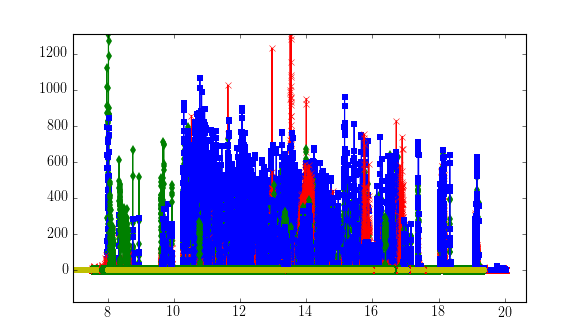

In [107]:
plt.figure()
for i,d in enumerate(dds[:-1]):
    plt.plot(cloud[i]['Start_UTC'],cloud[i]['SPP200SupTo'],'-xr')
    plt.plot(cloud[i]['Start_UTC'],cloud[i]['CASNtCloud'],'-dg',markeredgecolor='None')
    try:
        plt.plot(cloud[i]['Start_UTC'],cloud[i]['CDP_Conc'],'-sb',markeredgecolor='None')
    except:
        pass
    try:
        plt.plot(cdp[i]['Start_UTC'],cdp[i]['CDP_Conc'],'-sb',markeredgecolor='None')
    except:
        pass
    plt.plot(cloud[i]['Start_UTC'],cloud[i]['King_LWC_ad'],'-oy',markeredgecolor='None')
    

<IPython.core.display.Javascript object>


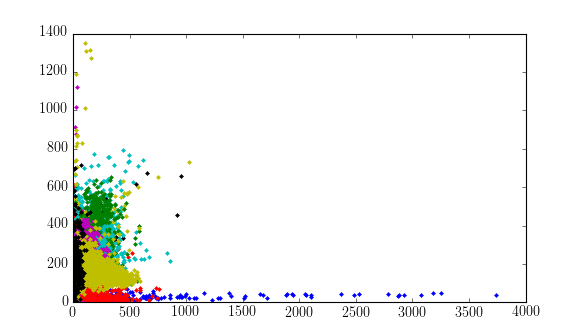

----- 20170807
142 24009 36877
171 28049 36877
5 3615 3621
----- 20170809
0 0 28329
935 27365 28329
1008 27291 28328
----- 20170812
807 29367 30177
636 29541 30177
826 29045 30177
----- 20170813
2958 30109 33071
2578 30492 33071
2976 29288 33071
----- 20170815
760 31840 34820
747 33260 34820
857 31301 34819
----- 20170817
695 32936 33669
602 33034 33669
697 31372 33668
----- 20170818
483 21081 25292
308 21163 25292
479 10584 20249
----- 20170819
0 2325 4714
8 2325 4714
NAN NAN NAN
----- 20170821
1417 28611 30077
1315 28568 30077
1420 22192 29325
----- 20170824
3515 31054 34620
3131 31312 34620
2710 10894 31019
----- 20170826
886 34911 38159
726 35072 38159
903 24717 34218
----- 20170828
1866 30995 32888
1610 30862 32888
1855 20712 31727
----- 20170830
1607 29432 31119
1589 29040 31119
1557 10015 28699
----- 20170831
569 28627 29217
509 28645 29217
495 2565 19785


In [109]:
plt.figure()
for i,d in enumerate(dds[:-1]):
    plt.plot(cloud[i]['SPP200SupTo'],cloud[i]['CASNtCloud'],'.')
    print '-----', d
    print len(cloud[i]['CASNtCloud'][cloud[i]['CASNtCloud']>10]),len(cloud[i]['CASNtCloud'][cloud[i]['CASNtCloud']<=10]),len(cloud[i]['CASNtCloud'])
    try:
        print len(cloud[i]['SPP200SupTo'][cloud[i]['SPP200SupTo']>10]),len(cloud[i]['SPP200SupTo'][cloud[i]['SPP200SupTo']<=10]),len(cloud[i]['SPP200SupTo'])
    except:
        print 'NAN','NAN','NAN'
    try:
        print len(cdp[i]['CDP_Conc'][cdp[i]['CDP_Conc']>10]),len(cdp[i]['CDP_Conc'][cdp[i]['CDP_Conc']<=10]),len(cdp[i]['CDP_Conc'])
    except:
        print 'NAN','NAN','NAN'

Use the treshold of 10 #/cc from CASNtCloud and SPP200SupTo (CAS and PSAP supermicron droplet concentration of higher than 10 per cubic cm) (based on email from Greg McFarguhar, from work by Sid on 2016-10-31 7:26)

In [15]:
p = []
for i,d in enumerate(dds[:-1]):
    g = {'Start_UTC':cloud[i]['Start_UTC']}
    if not d=='20170809':
        in_cld = ((cloud[i]['CASNtCloud']>10))
    else:
        g = {'Start_UTC':cdp[i]['Start_UTC']}
        in_cld = (cdp[i]['CDP_Conc']>10)
    g['in_cld'] = in_cld
    print d,sum(in_cld)
    p.append(g)

20170807 142
20170809 1008
20170812 807
20170813 2958
20170815 760
20170817 695
20170818 483
20170819 0
20170821 1417
20170824 3515
20170826 886
20170828 1866
20170830 1607
20170831 569


In [16]:
len(in_cld)

29217

# Start plotting the results

In [17]:
rt.keys()

[u'tau', u'utc', u'ki', u'sza', u'lon', u'lat', u'phase', u'alt', u'ref']

<IPython.core.display.Javascript object>


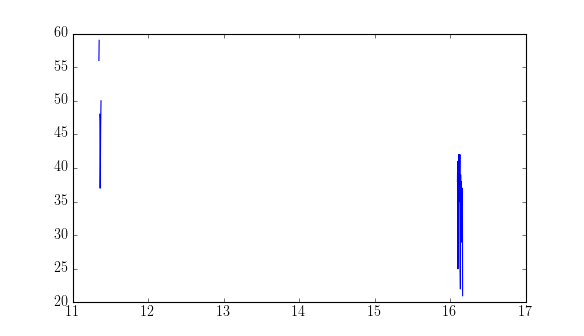

In [71]:
plt.figure()
plt.plot(rt['utc'],rt['tau'])

In [72]:
rt = rts[9]

<IPython.core.display.Javascript object>


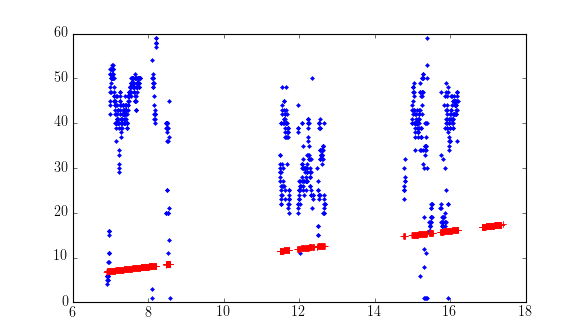

In [73]:
plt.figure()
plt.plot(rts[9]['utc'],rts[9]['tau'],'.')
plt.plot(rts[9]['utc'],rts[9]['utc'],'r+')

<IPython.core.display.Javascript object>


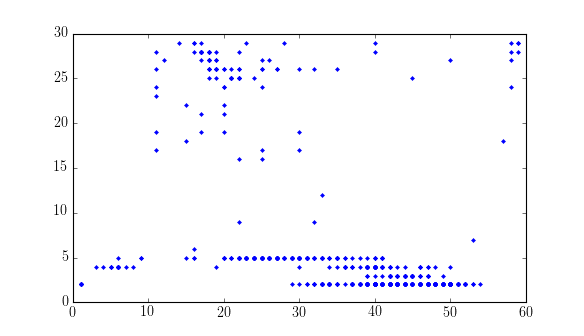

In [74]:
plt.figure()
plt.plot(rts[9]['tau'],rts[9]['ref'],'.')

In [75]:
igood = rts[9]['tau']>0

In [76]:
igood[0:10]

array([False, False, False,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [77]:
sp = sps[9]

<IPython.core.display.Javascript object>


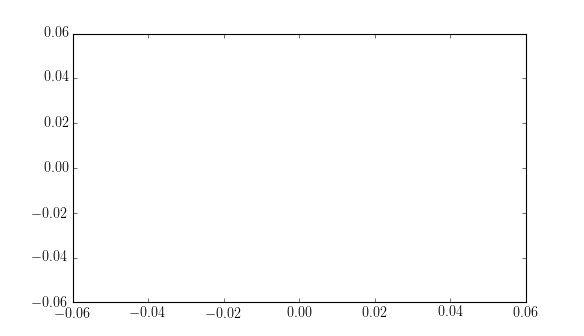

In [78]:
i=68
i_vis = [1061,1062,1064]
i_nir = [1060,1063]
plt.figure()
plt.plot(sp.wvl,sp.norm[i,:])
#plt.xlim(970,1030)
plt.plot(sp.wvl[i_vis],sp.norm[i,i_vis],'rx')
plt.plot(sp.wvl[i_nir],sp.norm[i,i_nir],'g+')


In [16]:
np.nanmean(sp.norm[i,iw])

NameError: name 'iw' is not defined

In [17]:
np.nanmean(sp.norm[i,ii])

NameError: name 'ii' is not defined

## Plot some of the sza for each day to ensure good fitting of lut

<IPython.core.display.Javascript object>


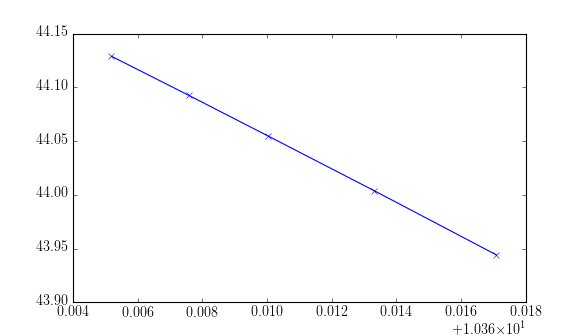

In [79]:
plt.figure()
plt.plot(sps[7].utc,sps[7].sza,'x-')

# Now setup filters to weed out bad data

## Filter out data points where nir and vis spectrometers don't match

In [18]:
i_vis = [1061,1062,1064]
i_nir = [1060,1063]

In [19]:
for i,daystr in enumerate(dds):
    nvis = np.nanmean(sps[i].norm[:,i_vis],axis=1)
    nnir = np.nanmean(sps[i].norm[:,i_nir],axis=1)
    rts[i]['delta'] = abs(nvis-nnir)
    rts[i]['fl_match'] = rts[i]['delta']<0.07
    print daystr,rts[i]['delta'].shape,rts[i]['delta'][rts[i]['fl_match']].shape,\
        float(rts[i]['delta'][rts[i]['fl_match']].shape[0])/ float(rts[i]['delta'].shape[0])*100.0

20170807 (129,) (0,) 0.0
20170809 (1247,) (824,) 66.0785886127
20170812 (412,) (283,) 68.6893203883
20170813 (1211,) (278,) 22.9562345169
20170815 (455,) (372,) 81.7582417582
20170817 (703,) (243,) 34.5661450925
20170818 (349,) (121,) 34.670487106
20170819 (5,) (0,) 0.0
20170821 (1566,) (0,) 0.0
20170824 (1356,) (741,) 54.6460176991
20170826 (337,) (108,) 32.0474777448
20170828 (541,) (256,) 47.3197781885
20170830 (186,) (133,) 71.5053763441
20170831 (83,) (26,) 31.3253012048
20170902 (44,) (19,) 43.1818181818


## Now filter out the times which were at too high altitude

In [114]:
fl_alt = rt['alt']<1500.0

In [115]:
for i,daystr in enumerate(dds):
    rts[i]['fl_alt'] = rts[i]['alt'][:,0]<1000.0
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_alt']].shape,\
        float(rts[i]['utc'][rts[i]['fl_alt']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20170807 (129L,) (52L,) 40.3100775194
20170809 (1247L,) (971L,) 77.8668805132
20170812 (412L,) (379L,) 91.9902912621
20170813 (1211L,) (506L,) 41.7836498761
20170815 (455L,) (423L,) 92.967032967
20170817 (703L,) (316L,) 44.9502133713
20170818 (349L,) (187L,) 53.5816618911
20170819 (5L,) (0L,) 0.0
20170821 (1566L,) (1386L,) 88.5057471264
20170824 (1356L,) (878L,) 64.7492625369
20170826 (337L,) (250L,) 74.1839762611
20170828 (541L,) (271L,) 50.0924214418
20170830 (186L,) (127L,) 68.2795698925
20170831 (83L,) (70L,) 84.3373493976
20170902 (44L,) (44L,) 100.0


## Filter for in cloud

In [116]:
from write_utils import nearest_neighbor

In [117]:
p[0]['in_cld']

array([False, False, False, ..., False, False, False], dtype=bool)

In [118]:
for i,daystr in enumerate(dds):
    try:
        putc = p[i]['Start_UTC']
    except IndexError: # no in cloud data, so choose all of them
        rts[i]['fl_incld'] = rts[i]['utc']>0.0
        continue
    rts[i]['incld'] = nearest_neighbor(putc,p[i]['in_cld'],rts[i]['utc'],dist=1.0/3600)
    rts[i]['fl_incld'] = rts[i]['incld']==0
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_incld']].shape,\
        float(rts[i]['utc'][rts[i]['fl_incld']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20170807 (129L,) (77L,) 59.6899224806
20170809 (1247L,) (554L,) 44.4266238974
20170812 (412L,) (365L,) 88.5922330097
20170813 (1211L,) (579L,) 47.8117258464
20170815 (455L,) (433L,) 95.1648351648
20170817 (703L,) (507L,) 72.119487909
20170818 (349L,) (334L,) 95.7020057307
20170819 (5L,) (1L,) 20.0
20170821 (1566L,) (1123L,) 71.711366539
20170824 (1356L,) (759L,) 55.9734513274
20170826 (337L,) (329L,) 97.6261127596
20170828 (541L,) (518L,) 95.7486136784
20170830 (186L,) (186L,) 100.0
20170831 (83L,) (71L,) 85.5421686747


## Filter for high ki squared residuals

In [119]:
for i,daystr in enumerate(dds):
    rts[i]['fl_ki'] = rts[i]['ki']<0.6
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl_ki']].shape,\
        float(rts[i]['utc'][rts[i]['fl_ki']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0

20170807 (129L,) (0L,) 0.0
20170809 (1247L,) (445L,) 35.6856455493
20170812 (412L,) (258L,) 62.6213592233
20170813 (1211L,) (295L,) 24.3600330306
20170815 (455L,) (335L,) 73.6263736264
20170817 (703L,) (204L,) 29.0184921764
20170818 (349L,) (129L,) 36.9627507163
20170819 (5L,) (0L,) 0.0
20170821 (1566L,) (0L,) 0.0
20170824 (1356L,) (493L,) 36.3569321534
20170826 (337L,) (82L,) 24.3323442136
20170828 (541L,) (244L,) 45.101663586
20170830 (186L,) (27L,) 14.5161290323
20170831 (83L,) (27L,) 32.5301204819
20170902 (44L,) (17L,) 38.6363636364


## Combine the filters

In [120]:
tot=0
tot_fl=0
for i,daystr in enumerate(dds):
    rts[i]['fl'] = rts[i]['fl_match'] & rts[i]['fl_alt'] & rts[i]['fl_ki'] & rts[i]['fl_incld']
    print daystr,rts[i]['utc'].shape,rts[i]['utc'][rts[i]['fl']].shape,\
        float(rts[i]['utc'][rts[i]['fl']].shape[0])/ float(rts[i]['utc'].shape[0])*100.0 
    tot = tot+len(rts[i]['utc'])
    tot_fl = tot_fl+len(rts[i]['utc'][rts[i]['fl']])

20170807 (129L,) (0L,) 0.0
20170809 (1247L,) (215L,) 17.2413793103
20170812 (412L,) (237L,) 57.5242718447
20170813 (1211L,) (228L,) 18.8274153592
20170815 (455L,) (304L,) 66.8131868132
20170817 (703L,) (175L,) 24.893314367
20170818 (349L,) (54L,) 15.4727793696
20170819 (5L,) (0L,) 0.0
20170821 (1566L,) (0L,) 0.0
20170824 (1356L,) (119L,) 8.77581120944
20170826 (337L,) (39L,) 11.5727002967
20170828 (541L,) (65L,) 12.0147874307
20170830 (186L,) (3L,) 1.61290322581
20170831 (83L,) (17L,) 20.4819277108
20170902 (44L,) (10L,) 22.7272727273


In [121]:
print tot, tot_fl, float(tot_fl)/float(tot)*100.0

8624 1466 16.9990723562


# Now plot each retrieved product, filtered

In [122]:
from Sp_parameters import smooth

<IPython.core.display.Javascript object>


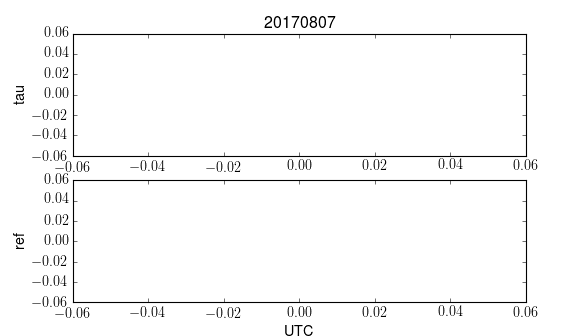

<IPython.core.display.Javascript object>


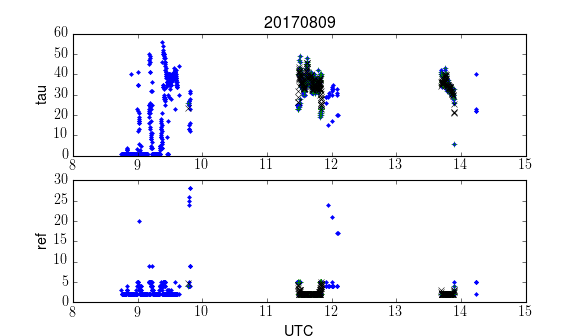

<IPython.core.display.Javascript object>


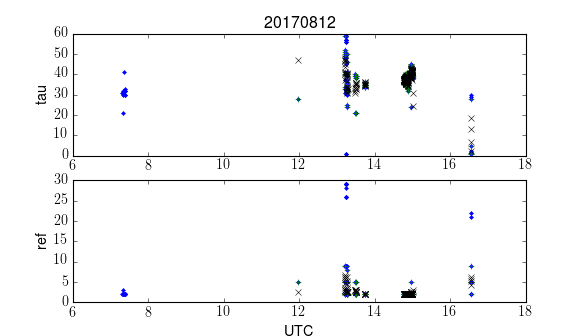

<IPython.core.display.Javascript object>


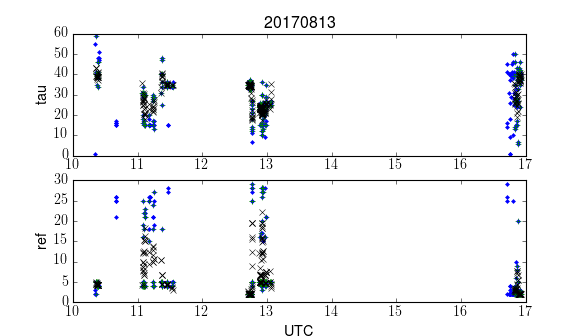

<IPython.core.display.Javascript object>


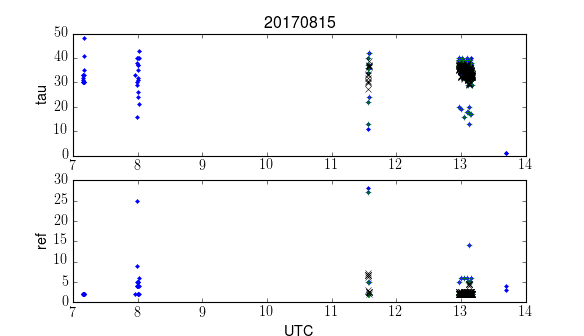

<IPython.core.display.Javascript object>


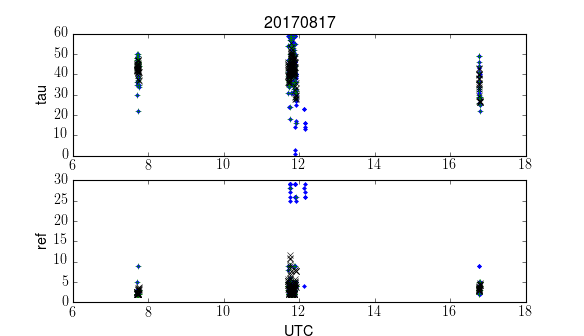

<IPython.core.display.Javascript object>


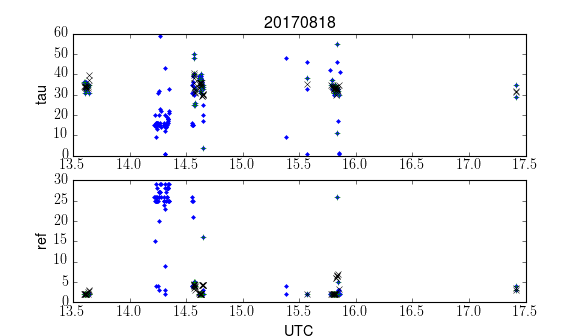

<IPython.core.display.Javascript object>


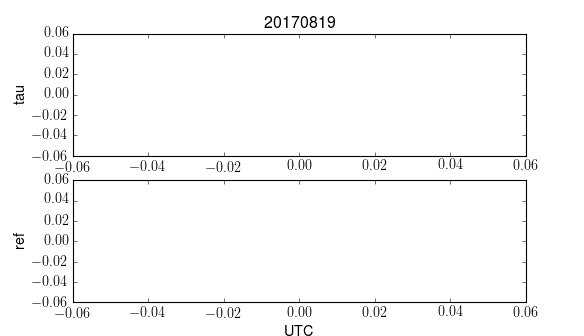

<IPython.core.display.Javascript object>


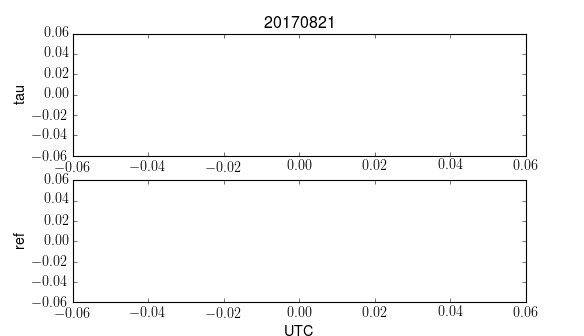

<IPython.core.display.Javascript object>


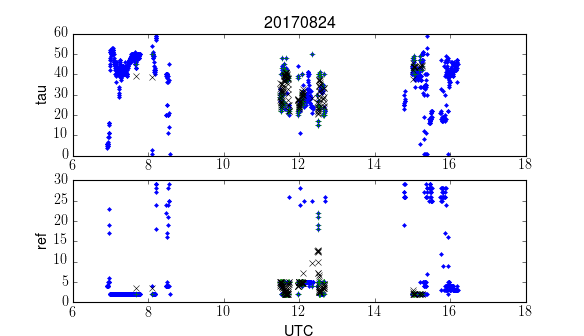

<IPython.core.display.Javascript object>


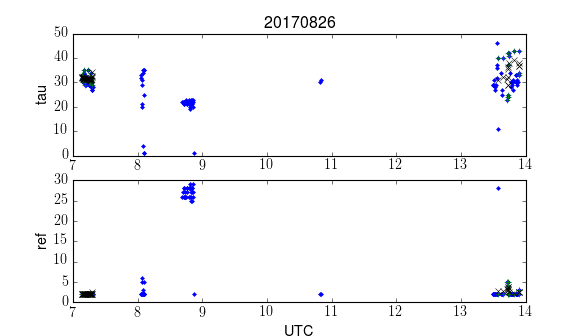

<IPython.core.display.Javascript object>


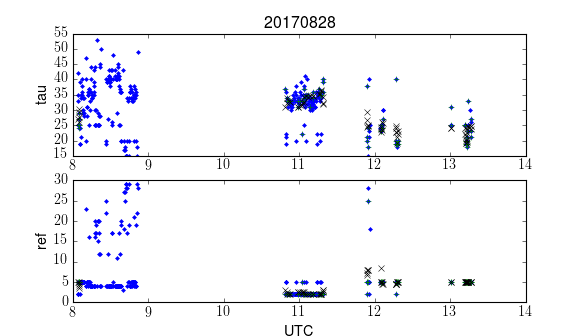

<IPython.core.display.Javascript object>


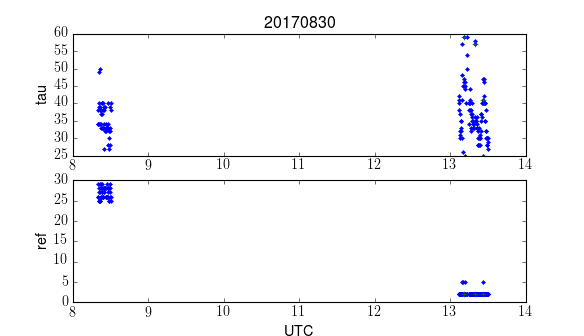

<IPython.core.display.Javascript object>


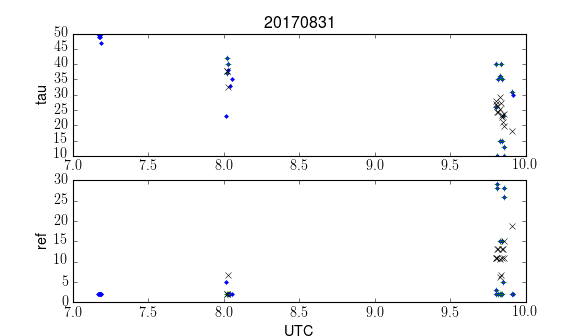

<IPython.core.display.Javascript object>


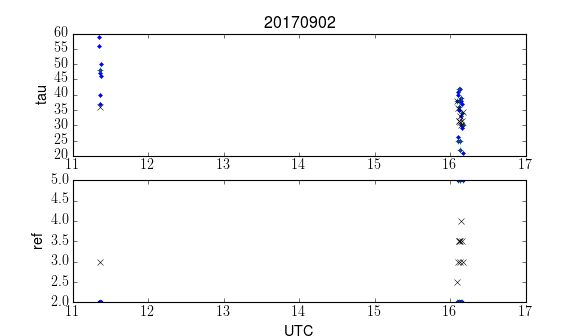

In [123]:
for i,daystr in enumerate(dds):
    plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212,sharex=ax1)
    ax1.plot(rts[i]['utc'],rts[i]['tau'],'b.')
    ax1.plot(rts[i]['utc'][rts[i]['fl']],rts[i]['tau'][rts[i]['fl']],'g+')
    try:
        ax1.plot(rts[i]['utc'][rts[i]['fl']],smooth(rts[i]['tau'][rts[i]['fl']],6),'kx')
    except:
        pass
    ax1.set_ylabel('tau')
    
    ax2.plot(rts[i]['utc'],rts[i]['ref'],'b.')
    ax2.plot(rts[i]['utc'][rts[i]['fl']],rts[i]['ref'][rts[i]['fl']],'g+')
    try:
        ax2.plot(rts[i]['utc'][rts[i]['fl']],smooth(rts[i]['ref'][rts[i]['fl']],6),'kx')
    except:
        pass
    ax2.set_ylabel('ref')
    ax2.set_xlabel('UTC')
    ax1.set_title(daystr)

In [124]:
for i,daystr in enumerate(dds):
    try:
        rts[i]['tau_fl'] = smooth(rts[i]['tau'][rts[i]['fl']],6)
        rts[i]['ref_fl'] = smooth(rts[i]['ref'][rts[i]['fl']],6)
    except:
        print 'except',i
        rts[i]['tau_fl'] = rts[i]['tau'][rts[i]['fl']]
        rts[i]['ref_fl'] = rts[i]['ref'][rts[i]['fl']]
    rts[i]['lat_fl'] = rts[i]['lat'][rts[i]['fl']]
    rts[i]['lon_fl'] = rts[i]['lon'][rts[i]['fl']]
    rts[i]['alt_fl'] = rts[i]['alt'][rts[i]['fl']]
    rts[i]['utc_fl'] = rts[i]['utc'][rts[i]['fl']]

except 0
except 7
except 8


In [125]:
rt.keys()

['fl_alt',
 u'tau',
 u'sza',
 'lat_fl',
 u'phase',
 u'alt',
 'lon_fl',
 'alt_fl',
 u'lon',
 'tau_fl',
 u'ref',
 'fl_ki',
 'incld',
 'utc_fl',
 'delta',
 u'lat',
 'fl',
 'fl_match',
 u'utc',
 u'ki',
 'fl_incld',
 'ref_fl']

# Now write these values to ict file

In [128]:
import write_utils as wu

In [126]:
hdict = {'PI':'Jens Redemann',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)',
     'campaign':'ORACLES 2017',
     'special_comments':'Retrieved cloud properties',
     'PI_contact':'Jens.Redemann-1@nasa.gov',
     'platform':'NASA P3',
     'location':'based out of Sao Tome, actual location of measurement included in file',
     'instrument_info':'Derived product from 4STAR zenith measurements',
     'data_info':'Using the cloud property retrieval method based on spectral transmitted light measurements described by LeBlanc, Pileskie, Schmidt, and Coddington (2015), AMT, modified to include impact of overlying aerosol layer.',
     'uncertainty':'Uncertainty of retrieved properties will be defined in future archival. Nominal uncertainty is 4-8%',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'ORACLES 2017 deployment; August-September 2017; Sao Tome',
     'stipulations':'Prior OK from PI is requested before using this data',
     'rev_comments':"""R0: Preliminary archival of cloud properties retrieved from 4STAR sky radiance measurements. Final radiance calibration applied. Filtered out bad measurements, in cloud measurements and high clouds retrievals. 
    Data is subject to uncertainties linked to detector stability, transfer efficiency of light through fiber optic cable, and deposition on the instrument window."""
    }
order = ['LAT','LON','COD','REF']

In [131]:
for i,daystr in enumerate(dds):
    if i in [0,7,8,12]: continue
    d_dict = {'Start_UTC':{'data':rts[i]['utc'][rts[i]['fl']]*3600.0,'unit':'seconds from midnight UTC','long_description':'time keeping'},
              'utc':{'data':rts[i]['utc'][rts[i]['fl']],'unit':'seconds from midnight UTC','long_description':'time keeping'},
          'COD':{'data':rts[i]['tau_fl'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
          'REF':{'data':rts[i]['ref_fl'],'unit':'micrometer','long_description':'Cloud drop effective radius for liquid clouds'},
          'LAT':{'data':rts[i]['lat'][rts[i]['fl']],'unit':'Degrees','long_description':'Latitude of measurement, negative for Southern hemisphere'},
          'LON':{'data':rts[i]['lon'][rts[i]['fl']],'unit':'Degrees','long_description':'Longitude of measurement, East is positive, from -180 to 180'}
          }
    d_dict_out = wu.prep_data_for_ict(d_dict,in_var_name='utc',out_var_name='Start_UTC', in_input=True,time_interval=1.0)
    wu.write_ict(hdict,d_dict_out,filepath=fp+'..//zen_ict_2017/v1/',
              data_id='4STAR_CLD',loc_id='P3',date=daystr,rev='R0',order=order)    

LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/ORACLES/starzen_2017/..//zen_ict_2017/v1/4STAR-CLD_P3_20170809_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/ORACLES/starzen_2017/..//zen_ict_2017/v1/4STAR-CLD_P3_20170812_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/ORACLES/starzen_2017/..//zen_ict_2017/v1/4STAR-CLD_P3_20170813_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/ORACLES/starzen_2017/..//zen_ict_2017/v1/4STAR-CLD_P3_20170815_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/ORACLES/starzen_2017/..//zen_ict_2017/v1/4STAR-CLD_P3_20170817_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/ORACLES/starzen_2017/..//zen_ict_2017/v1/4STAR-CLD_P3_20170818_R0.ict
LAT
LON
COD
REF
File writing successful to: C:/Users/sleblan2/Research/ORACLES/starzen_2017/..//zen_ict_2017/v1/4STAR-CLD_P3_20170824_R0.ict
LAT
LON
COD
R

## For use of this python, save values to mat files

In [132]:
rtss = {str(i):rr for i,rr in enumerate(rts)}

In [133]:
def dict_keys_to_unicode(d):
    out = dict()
    for k, v in d.items():
        out[k.decode()] = v
    return out

for n in rtss.keys():
    if type(rtss[n]) is list:
        print n
        for i,t in enumerate(rtss[n]):
            rtss[n][i] = dict_keys_to_unicode(t)
    else:
        print 'no',n
        rtss[n] = dict_keys_to_unicode(rtss[n])


no 11
no 10
no 13
no 12
no 14
no 1
no 0
no 3
no 2
no 5
no 4
no 7
no 6
no 9
no 8


In [134]:
hs.savemat(fp+'..//zen_ict_2017/v1/{}_all_retrieved.mat'.format(vr),rtss)

## Optionally load the saved mat files

In [23]:
rtss = hs.loadmat(fp+'..//zen_ict/v3/{}_all_retrieved.mat'.format(vr))

In [34]:
if not 'rts' in locals():
    rts = []
    for n in sorted([int(u) for u in rtss.keys()]):
        rts.append(rtss[str(n)])
elif not rts:
    for n in sorted([int(u) for u in rtss.keys()]):
        rts.append(rtss[str(n)])

# Make plots

## Read the files as a verification

In [135]:
vv = 'R0'

In [136]:
from load_utils import load_ict

In [139]:
out_RA = []
out_head_RA = []
for i,d in enumerate(dds):
    try: 
        fname_aod = fp+'..//zen_ict_2017/v1/4STAR-CLD_P3_{}_{vr}.ict'.format(d,vr=vr)
        tt,th = load_ict(fname_aod,return_header=True)
    except:
        print 'problem with {}'.format(d)
        dds.pop(i)
        continue
    out_RA.append(tt)
    out_head_RA.append(th)

problem with 20170807
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
problem with 20170819
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
problem with 20170830
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')


In [140]:
out_head_RA[0]

['40, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2017\n',
 '1,1\n',
 '2017,08,12,2017,11,14\n',
 '1.0\n',
 'Start_UTC, Seconds, Time of measurement continuous starting from midnight UTC\n',
 '4\n',
 '1,1,1,1\n',
 '-9999.000,-9999.000,-9999.000,-9999.000\n',
 'LAT, Degrees, Latitude of measurement, negative for Southern hemisphere\n',
 'LON, Degrees, Longitude of measurement, East is positive, from -180 to 180\n',
 'COD, None, Cloud Optical Depth of overlying cloud\n',
 'REF, micrometer, Cloud drop effective radius for liquid clouds\n',
 '1\n',
 'Retrieved cloud properties\n',
 '21\n',
 '-----------------------------------------------------------------------------\n',
 'PI_CONTACT_INFO: Jens.Redemann-1@nasa.gov\n',
 'PLATFORM: NASA P3\n',
 'LOCATION: based out of Sao Tome, actual location of measurement included in file\n',
 'ASSOCIATED_DATA: N/A\n',
 'INSTRUMENT_INFO: Derived pro

In [141]:
nm = out_RA[0].dtype.names

In [142]:
nm

('Start_UTC', 'LAT', 'LON', 'COD', 'REF')

<IPython.core.display.Javascript object>


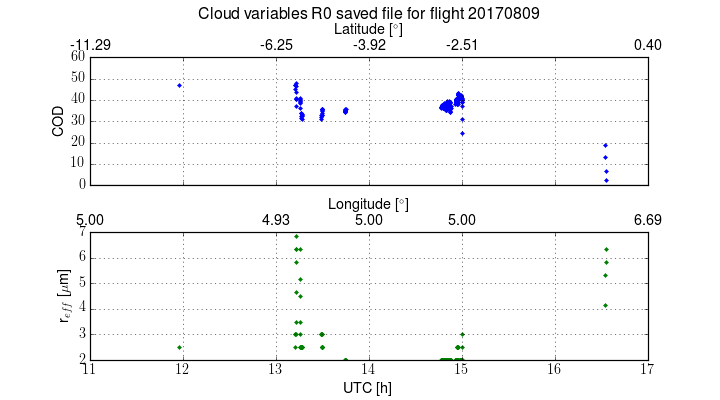

<IPython.core.display.Javascript object>


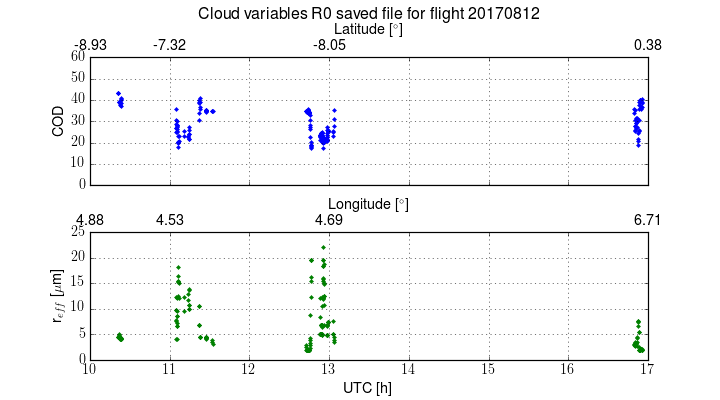

<IPython.core.display.Javascript object>


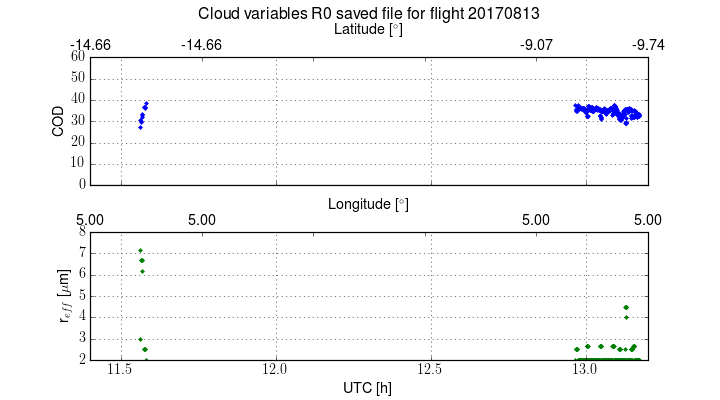

<IPython.core.display.Javascript object>


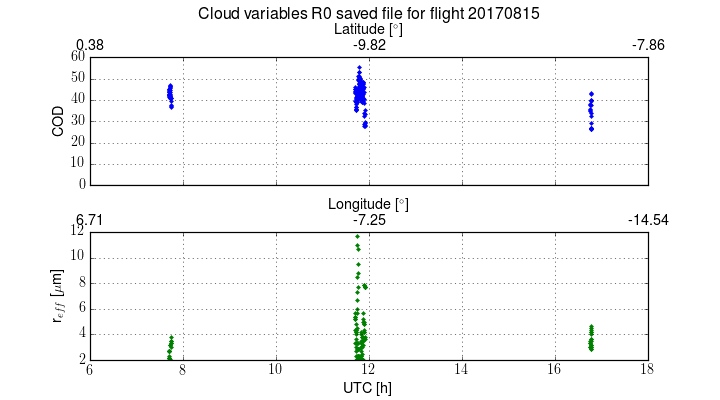

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2400 but corresponding boolean dimension is 1201
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2400 but corresponding boolean dimension is 1201


<IPython.core.display.Javascript object>


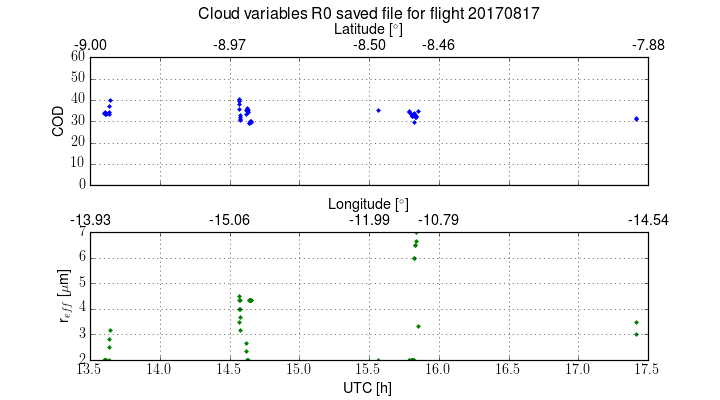

<IPython.core.display.Javascript object>


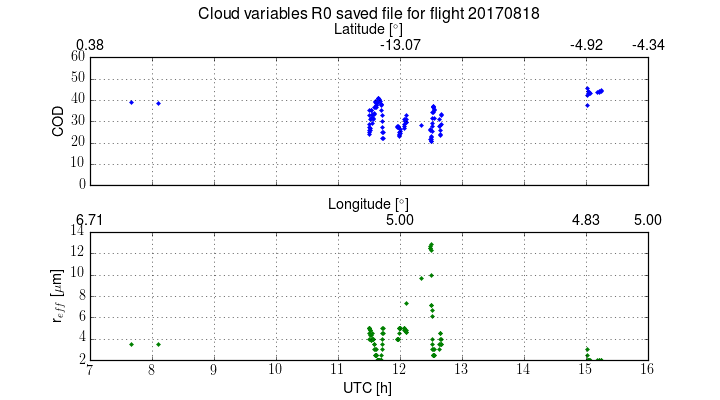

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2400 but corresponding boolean dimension is 2087
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2400 but corresponding boolean dimension is 2087


<IPython.core.display.Javascript object>


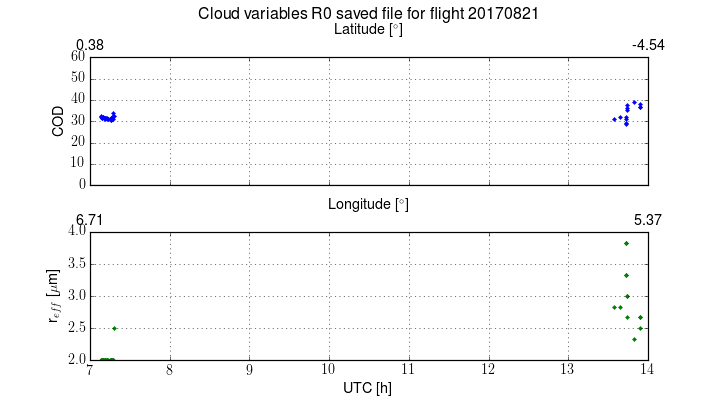

<IPython.core.display.Javascript object>


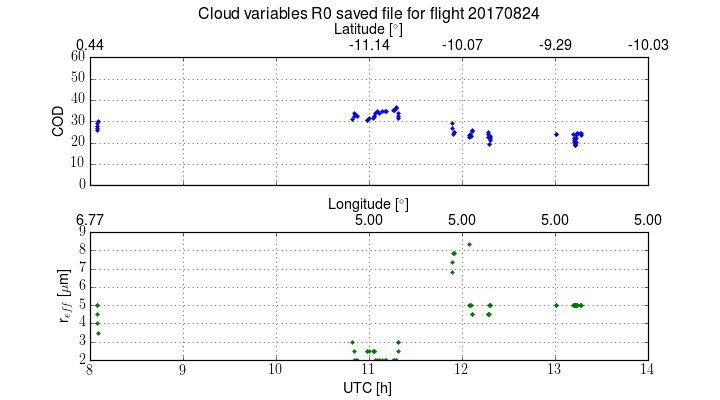

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2400 but corresponding boolean dimension is 2216
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2400 but corresponding boolean dimension is 2216


<IPython.core.display.Javascript object>


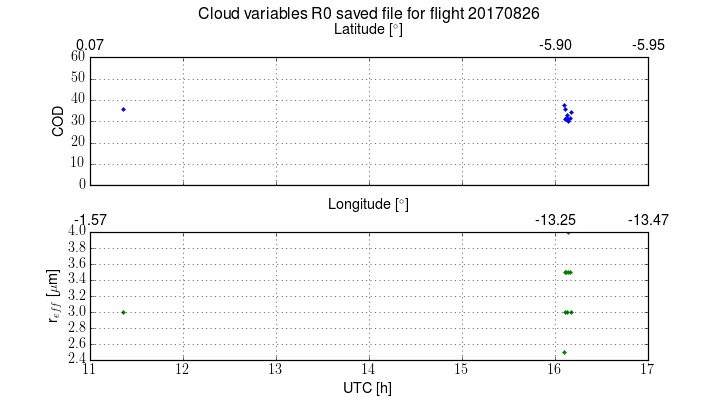

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2400 but corresponding boolean dimension is 1820
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2400 but corresponding boolean dimension is 1820


<IPython.core.display.Javascript object>


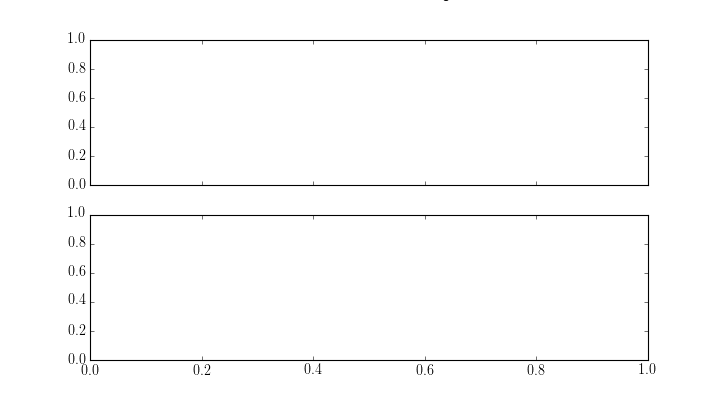

IndexError: list index out of range

In [143]:
for i,d in enumerate(dds):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Cloud variables {} saved file for flight {}'.format(vv,d),y=1.25)
    #ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    ax[0].plot(out_RA[i][nm[0]],out_RA[i]['COD'],'.')
    ax[0].set_ylabel('COD')
    ax[0].set_ylim(0,60)
    ax[0].axhline(0,color='k')
    ax[0].grid()
    axy0 = ax[0].twiny()
    axy0.set_xlim(ax[0].get_xlim())
    xt = ax[0].get_xticks()
    xl = []
    for x in xt:
        ii = np.argmin(abs(out_RA[i][nm[0]]-x))
        if np.isfinite(out_RA[i]['LAT'][ii]):
            xl.append('{:2.2f}'.format(out_RA[i]['LAT'][ii]))
        else:
            ia = np.isfinite(out_RA[i]['LAT'][ii-1200:ii+1200])
            if any(ia):
                laa = np.interp([1200],np.arange(2400)[ia],out_RA[i]['LAT'][ii-1200:ii+1200][ia])
                if not np.isfinite(laa[0]):
                    xl.append(' ')
                else:
                    xl.append('{:2.2f}'.format(laa[0]))
            else: xl.append(' ')
    axy0.set_xticks(xt)
    axy0.set_xticklabels(xl)
    axy0.set_xlabel('Latitude [$^\\circ$]')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width, box.height*0.88])
    axy0.set_position([box.x0, box.y0, box.width, box.height*0.88])
    
    ax[1].plot(out_RA[i][nm[0]],out_RA[i]['REF'],'g.')
    ax[1].set_ylabel('r$_{{eff}}$ [$\\mu$m]')
    ax[1].set_xlabel('UTC [h]')
    ax[1].grid()
    axy1 = ax[1].twiny()
    axy1.set_xlim(ax[1].get_xlim())
    x1t = ax[1].get_xticks()
    x1l = []
    for x in x1t:
        ii = np.argmin(abs(out_RA[i][nm[0]]-x))
        if np.isfinite(out_RA[i]['LON'][ii]):
            x1l.append('{:2.2f}'.format(out_RA[i]['LON'][ii]))
        else:
            iio = np.isfinite(out_RA[i]['LON'][ii-1200:ii+1200])
            if any(iio):
                loo = np.interp([1200],np.arange(2400)[iio],out_RA[i]['LON'][ii-1200:ii+1200][iio])
                if not np.isfinite(loo[0]):
                    x1l.append(' ')
                else:
                    x1l.append('{:2.2f}'.format(loo[0]))
            else: x1l.append(' ')
    axy1.set_xticks(x1t)
    axy1.set_xticklabels(x1l)
    axy1.set_xlabel('Longitude [$^\\circ$]')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width, box.height*0.88])
    axy1.set_position([box.x0, box.y0, box.width, box.height*0.88])
    plt.savefig(fp+'..//zen_ict_2017/v1/{vv}_{}.png'.format(d,vv=vv),dpi=600,transparent=True)

## Combine the data into a single array

In [144]:
ar = {}
for n in rts[0].keys():
    ar[n] = np.array([])

In [145]:
ar['days'] = np.array([])

In [146]:
for i,d in enumerate(dds):
    ar['days'] = np.append(ar['days'],np.zeros_like(rts[i]['utc'])+i)
    for n in rts[0].keys():
        ar[n] = np.append(ar[n],rts[i][n])

## Save the combined array

In [147]:
import hdf5storage as hs

In [148]:
hs.savemat(fp+'..//zen_ict_2017/v1/{}_all_cld_ict.mat'.format(vr),ar)

## Optionally load the all ict file

In [7]:
if not 'ar' in locals():
    ar = hs.loadmat(fp+'..//zen_ict/v3/{}_all_cld_ict.mat'.format(vr))

## plot the data on a map

In [149]:
import plotting_utils as pu

In [150]:
from map_interactive import build_basemap

In [151]:
rts[i]['tau_fl']

array([ 27.        ,  26.16666667,  27.83333333,  29.33333333,
        30.33333333,  31.        ,  32.33333333,  33.83333333,
        32.83333333,  32.66666667,  30.83333333,  30.83333333,
        31.5       ,  31.66666667,  32.33333333,  32.66666667,
        34.16666667,  34.66666667,  34.16666667,  34.66666667,
        34.66666667,  34.66666667,  35.33333333,  35.33333333,
        36.16666667,  36.66666667,  34.16666667,  31.83333333,
        32.33333333,  29.33333333,  26.83333333,  24.33333333,
        24.83333333,  25.16666667,  22.83333333,  23.83333333,
        24.33333333,  23.33333333,  26.16666667,  25.66666667,
        24.83333333,  24.        ,  22.66666667,  22.83333333,
        19.33333333,  21.16666667,  22.16666667,  23.16666667,
        24.16666667,  24.16666667,  24.16666667,  22.16666667,
        21.33333333,  20.16666667,  19.16666667,  19.16666667,
        19.5       ,  20.16666667,  22.33333333,  23.83333333,
        24.5       ,  24.66666667,  24.66666667,  24.66

In [152]:
for i,daystr in enumerate(dds):
    print rts[i]['lat'][rts[i]['fl']][:,0].shape,rts[i]['lon'][rts[i]['fl']][:,0].shape,rts[i]['tau_fl'].shape

(0L,) (0L,) (0L,)
(215L,) (215L,) (215L,)
(237L,) (237L,) (237L,)
(228L,) (228L,) (228L,)
(304L,) (304L,) (304L,)
(175L,) (175L,) (175L,)
(54L,) (54L,) (54L,)
(0L,) (0L,) (0L,)
(0L,) (0L,) (0L,)
(119L,) (119L,) (119L,)
(39L,) (39L,) (39L,)
(65L,) (65L,) (65L,)


<IPython.core.display.Javascript object>


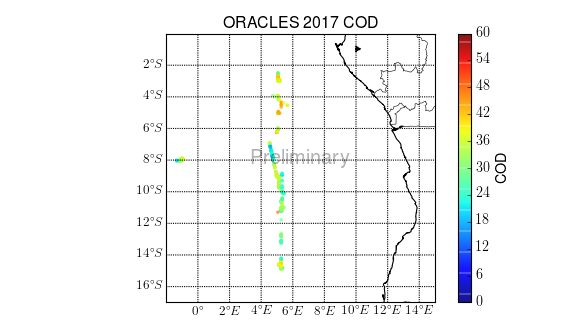

In [156]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-2,-17],upper_right=[15,0],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['tau_fl'],
              s=10,alpha=0.7,vmin=0.0,vmax=60.0,edgecolor='None')
    sa.append(sca)
    plt.title('ORACLES 2017 COD')
pu.prelim()
cb = plt.colorbar(sa[1])
cb.set_label('COD')
plt.savefig(fp+'..//zen_ict_2017/v1/{}_COD_map.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


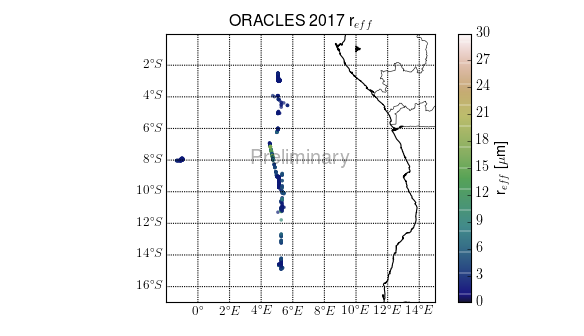

In [158]:
fig = plt.figure()
ax = plt.subplot(111)
m = build_basemap(lower_left=[-2,-17],upper_right=[15,0],ax=ax,larger=False)
sa = []
for i,daystr in enumerate(dds):
    x,y = m(rts[i]['lon'][rts[i]['fl']][:,0]+i*0.03,rts[i]['lat'][rts[i]['fl']][:,0])
    sca = ax.scatter(x,y,c=rts[i]['ref_fl'],
              s=10,alpha=0.7,vmin=0.0,vmax=30.0,edgecolor='None',cmap=plt.cm.gist_earth)
    sa.append(sca)
plt.title('ORACLES 2017 r$_{{eff}}$')
pu.prelim()
cb = plt.colorbar(sa[1])
cb.set_label('r$_{{eff}}$ [$\\mu$m]')
plt.savefig(fp+'..//zen_ict_2017/v1/{}_REF_map.png'.format(vr),transparent=True,dpi=600)

## Plot out some statistics of all retrievals

<IPython.core.display.Javascript object>


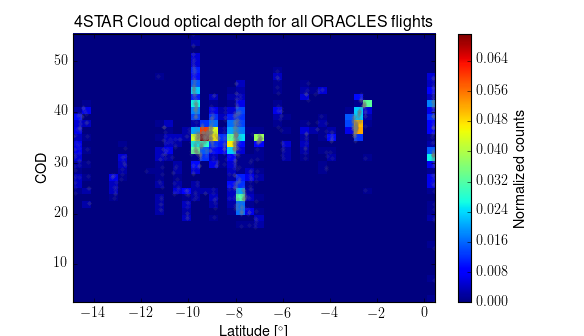

In [159]:
plt.figure()
plt.plot(ar['lat_fl'],ar['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lat_fl'],ar['tau_fl'],bins=40,normed=True)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Cloud optical depth for all ORACLES flights')
plt.savefig(fp+'..//zen_ict_2017/v1/{}_COD_hist_lat.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


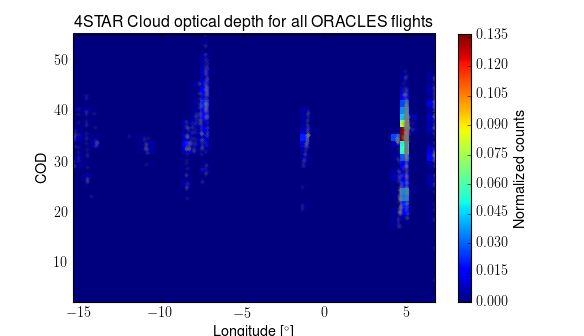

In [160]:
plt.figure()
plt.plot(ar['lon_fl'],ar['tau_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lon_fl'],ar['tau_fl'],bins=40,normed=True)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('COD')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Cloud optical depth for all ORACLES flights')
plt.savefig(fp+'..//zen_ict_2017/v1/COD_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


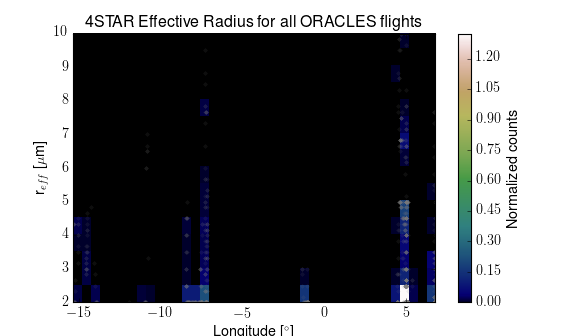

In [161]:
plt.figure()
plt.plot(ar['lon_fl'],ar['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lon_fl'],ar['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
plt.ylim(2,10)
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Effective Radius for all ORACLES flights')
plt.savefig(fp+'..//zen_ict_2017/v1/ref_hist_lon.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


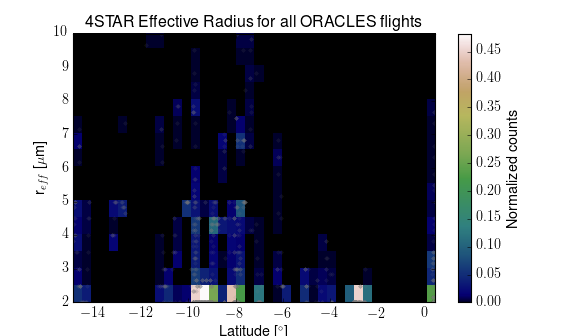

In [164]:
plt.figure()
plt.plot(ar['lat_fl'],ar['ref_fl'],'.',color='grey',alpha=0.1)
plt.hist2d(ar['lat_fl'],ar['ref_fl'],bins=40,normed=True,cmap=plt.cm.gist_earth)
plt.ylim(2,10)
plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('r$_{{eff}}$ [$\\mu$m]')
cb = plt.colorbar()
cb.set_label('Normalized counts')
plt.title('4STAR Effective Radius for all ORACLES flights')
plt.savefig(fp+'..//zen_ict_2017/v1/ref_hist_lat.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


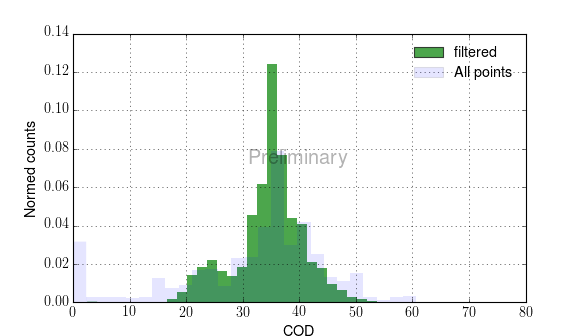

In [165]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict_2017/v1/cod_hist.png',transparent=True,dpi=600)

In [166]:
ar.keys()

['fl_alt',
 u'tau',
 u'sza',
 'lat_fl',
 u'phase',
 u'alt',
 'lon_fl',
 'alt_fl',
 u'lon',
 'tau_fl',
 u'ref',
 'fl_ki',
 'incld',
 'utc_fl',
 'delta',
 u'lat',
 'fl',
 'fl_match',
 u'utc',
 'ref_fl',
 'days',
 'fl_incld',
 u'ki']

In [167]:
aam = ar['utc_fl']<12.0
apm = ar['utc_fl']>12.0

<IPython.core.display.Javascript object>


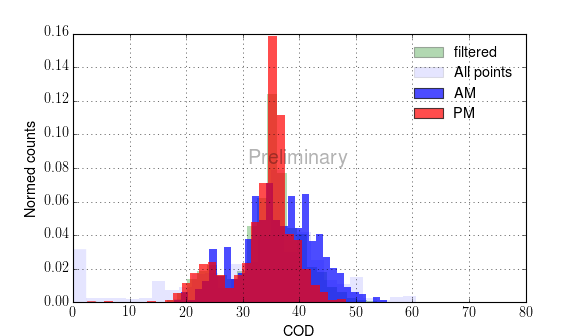

In [168]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.3,normed=True,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='All points')
plt.hist(ar['tau_fl'][aam],bins=30,edgecolor='None',color='b',alpha=0.7,normed=True,label='AM')
plt.hist(ar['tau_fl'][apm],bins=30,edgecolor='None',color='r',alpha=0.7,normed=True,label='PM')
plt.ylabel('Normed counts')
plt.xlabel('COD')
plt.grid()
pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict_2017/v1/cod_hist_pm_am.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


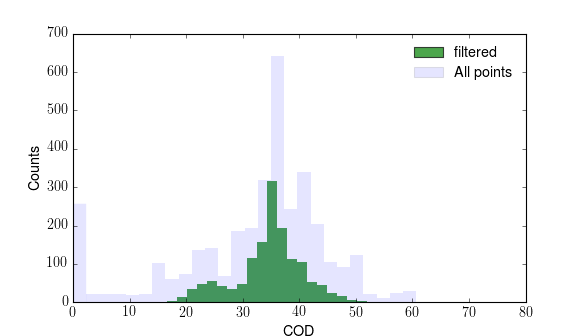

In [169]:
fig = plt.figure()
plt.hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,70),label='All points')
plt.ylabel('Counts')
plt.xlabel('COD')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict_2017/v1/cod_hist_all.png',transparent=True,dpi=600)

In [170]:
np.nanmean(ar['tau_fl'])

34.575615134633239

In [171]:
np.nanmean(ar['ref_fl'])

3.3428505106778084

<IPython.core.display.Javascript object>


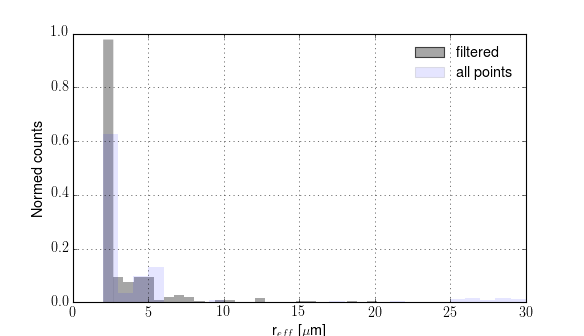

In [172]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
plt.ylabel('Normed counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
#pu.prelim()
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict_2017/v1/{}_ref_hist.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


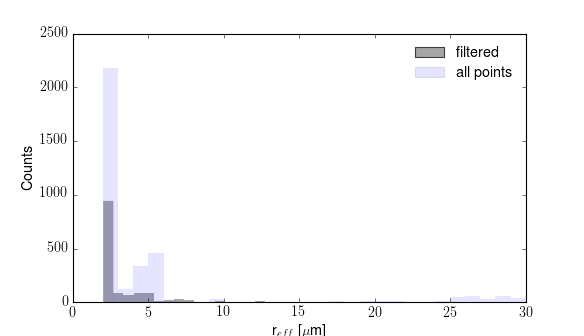

In [173]:
fig = plt.figure()
plt.hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=False,label='filtered')
plt.hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=False,range=(0,30),label='all points')
plt.ylabel('Counts')
plt.xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.legend(frameon=False)
plt.savefig(fp+'..//zen_ict_2017/v1/{}_ref_hist_all.png'.format(vr),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


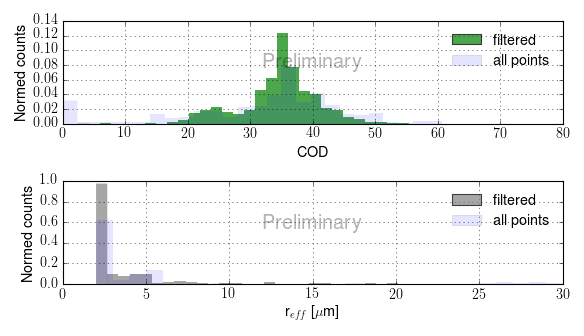

In [174]:
fig,ax = plt.subplots(2,1)
ax = ax.ravel()
ax[0].hist(ar['tau_fl'],bins=30,edgecolor='None',color='g',alpha=0.7,normed=True,label='filtered')
ax[0].hist(ar['tau'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,70),label='all points')
ax[0].set_ylabel('Normed counts')
ax[0].set_xlabel('COD')
ax[0].grid()
pu.prelim(ax=ax[0])
ax[0].legend(frameon=False)

ax[1].hist(ar['ref_fl'],bins=30,edgecolor='None',color='grey',alpha=0.7,normed=True,label='filtered')
ax[1].hist(ar['ref'],bins=30,edgecolor='None',color='b',alpha=0.1,normed=True,range=(0,30),label='all points')
ax[1].set_ylabel('Normed counts')
ax[1].set_xlabel('r$_{{eff}}$ [$\\mu$m]')
plt.grid()
pu.prelim(ax=ax[1])
plt.legend(frameon=False)

plt.tight_layout()

plt.savefig(fp+'..//zen_ict_2017/v1/{}_ref_cod_hist.png'.format(vr),transparent=True,dpi=600)

# Evaluate the Cloud Radiative Effect (CRE) from calculated retrieved values

Based on the calculations of CRE found in Link to [ORACLES_cld_CRE](ORACLES_cld_CRE.ipynb)

After running calculations on Pleaides, results are read in and operated

## Load results

In [37]:
fp

'C:/Users/sleblan2/Research/ORACLES/starzen/'

In [38]:
c = hs.loadmat(fp+'../rtm/ORACLES_CRE_{}.mat'.format('v2'))

In [39]:
c.keys()

[u'star_aero_CRE',
 u'star_noaero_C',
 u'star_noaero_CRE',
 u'star_noaero_CRE_clear',
 u'star_aero_CRE_clear',
 u'star_aero_C']

In [40]:
c['star_aero_C']

array([[ -45.9273323 ,  -46.48854   ,  -43.07040923],
       [ -46.7963013 ,  -47.36605   ,  -43.88047923],
       [ -47.232753  ,  -47.80663   ,  -44.28713922],
       ..., 
       [ -62.406951  ,  -64.31951   ,  -59.02220922],
       [-201.167639  , -200.14736   , -182.99878665],
       [-177.190489  , -176.12333   , -161.21438713]])

## Start plotting results of CRE

In [41]:
import plotting_utils as pu

<IPython.core.display.Javascript object>


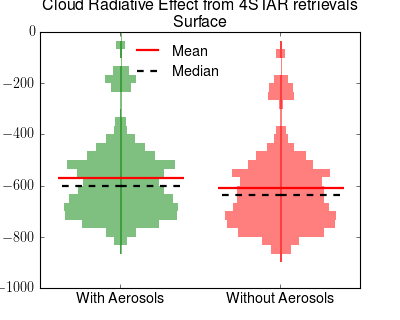

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [42]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-1000,0],xlim=[-0.5,1.5])
ax1.set_ylabel('Cloud Radiative Effect [W/m$^2$]')
ax1.set_title('Cloud Radiative Effect from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,c['star_aero_C'][:,0],0,[-1000,0],legend=True,onlyhist=False,loc=2,color='g',bins=30)
pu.plot_vert_hist(fig,ax1,c['star_noaero_C'][:,0],1,[-1000,0],legend=True,color='r',bins=30)
plt.savefig(fp+'../plot/ORACLES_surface_CRE_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


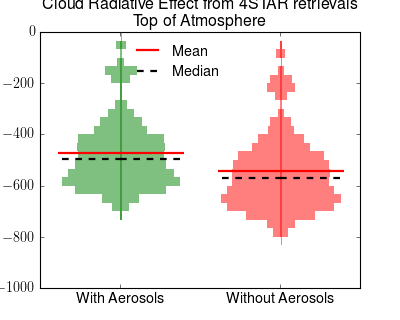

In [43]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-1000,0],xlim=[-0.5,1.5])
ax1.set_ylabel('Cloud Radiative Effect [W/m$^2$]')
ax1.set_title('Cloud Radiative Effect from 4STAR retrievals\nTop of Atmosphere')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,c['star_aero_C'][:,2],0,[-1000,0],legend=True,onlyhist=False,loc=2,color='g',bins=30)
pu.plot_vert_hist(fig,ax1,c['star_noaero_C'][:,2],1,[-1000,0],legend=True,color='r',bins=30)
plt.savefig(fp+'../plot/ORACLES_CRE_toa_4STAR.png',transparent=True,dpi=600)

In [48]:
print 'Surface CRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(c['star_aero_C'][:,0]),np.nanmean(c['star_noaero_C'][:,0]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(c['star_aero_C'][:,0]),np.nanmedian(c['star_noaero_C'][:,0]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(c['star_aero_C'][:,0]),np.nanstd(c['star_noaero_C'][:,0]))

Surface CRE
mean aero: -571.210240685, no aero: -610.312619598
median aero: -601.360284941, no aero: -638.132627512
std aero: 160.861793015, no aero: 162.326799866


In [49]:
print 'TOA CRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(c['star_aero_C'][:,2]),np.nanmean(c['star_noaero_C'][:,2]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(c['star_aero_C'][:,2]),np.nanmedian(c['star_noaero_C'][:,2]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(c['star_aero_C'][:,2]),np.nanstd(c['star_noaero_C'][:,2]))

TOA CRE
mean aero: -473.465602992, no aero: -544.230326019
median aero: -496.637744272, no aero: -569.149741202
std aero: 136.162857642, no aero: 147.735737961


<IPython.core.display.Javascript object>


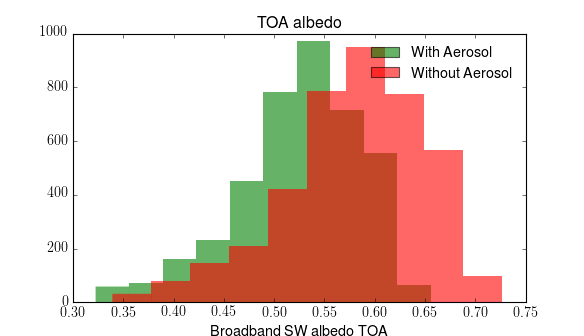

In [50]:
plt.figure()
plt.hist(c['star_aero_CRE']['up'][:,2]/c['star_aero_CRE']['dn'][:,2],normed=False,edgecolor='None',color='g',
         alpha=0.6,label='With Aerosol')
plt.hist(c['star_noaero_CRE']['up'][:,2]/c['star_noaero_CRE']['dn'][:,2],normed=False,edgecolor='None',color='r',
         alpha=0.6,label='Without Aerosol')
plt.xlabel('Broadband SW albedo TOA')
plt.legend(frameon=False)
plt.title('TOA albedo')
plt.savefig(fp+'../plot/ORACLES_albedo_toa_4STAR.png',transparent=True,dpi=600)

## calculate and plot the relative CRE

In [62]:
star_aero_rC = np.zeros_like(c['star_aero_C'])
star_noaero_rC = np.zeros_like(c['star_aero_C'])

In [88]:
star_aero_rC[:,0] = c['star_aero_C'][:,0]/c['star_aero_CRE']['dn'][:,2]*100.0
star_aero_rC[:,1] = c['star_aero_C'][:,1]/c['star_aero_CRE']['dn'][:,2]*100.0
star_aero_rC[:,2] = c['star_aero_C'][:,2]/c['star_aero_CRE']['dn'][:,2]*100.0
star_noaero_rC[:,0] = c['star_noaero_C'][:,0]/c['star_noaero_CRE']['dn'][:,2]*100.0
star_noaero_rC[:,1] = c['star_noaero_C'][:,1]/c['star_noaero_CRE']['dn'][:,2]*100.0
star_noaero_rC[:,2] = c['star_noaero_C'][:,2]/c['star_noaero_CRE']['dn'][:,2]*100.0

In [91]:
star_aero_rC_abc = np.zeros_like(c['star_aero_C'])
star_noaero_rC_abc = np.zeros_like(c['star_aero_C'])

star_aero_rC_abc[:,0] = c['star_aero_C'][:,0]/c['star_aero_CRE']['dn'][:,1]*100.0
star_noaero_rC_abc[:,0] = c['star_noaero_C'][:,0]/c['star_noaero_CRE']['dn'][:,1]*100.0

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


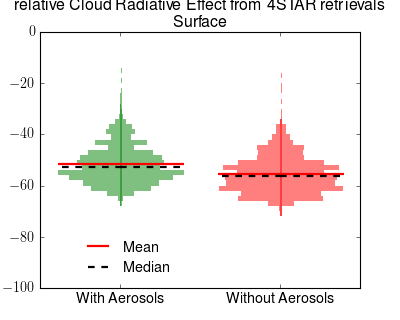

In [89]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,0],0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star_noaero_rC[:,0],1,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'../plot/ORACLES_rCRE_surface_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


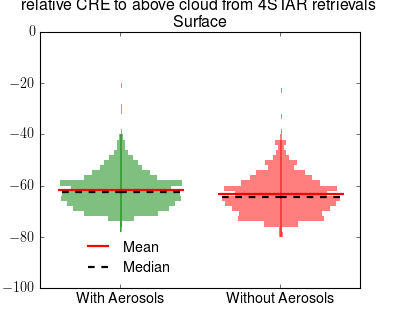

In [90]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative CRE to above cloud from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,c['star_aero_C'][:,0]/c['star_aero_CRE']['dn'][:,1]*100.0,0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,c['star_noaero_C'][:,0]/c['star_noaero_CRE']['dn'][:,1]*100.0,1,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'../plot/ORACLES_rCRE_above_cloud_for_surface_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


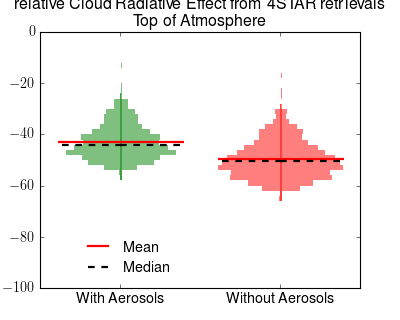

In [84]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect from 4STAR retrievals\nTop of Atmosphere')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Aerosols','Without Aerosols'])
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,2],0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star_noaero_rC[:,2],1,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'../plot/ORACLES_rCRE_toa_4STAR.png',transparent=True,dpi=600)

In [85]:
print 'Surface rCRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(star_aero_rC[:,0]),np.nanmean(star_noaero_rC[:,0]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(star_aero_rC[:,0]),np.nanmedian(star_noaero_rC[:,0]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(star_aero_rC[:,0]),np.nanstd(star_noaero_rC[:,0]))

Surface rCRE
mean aero: -51.5566189351, no aero: -63.4650491684
median aero: -52.8564701366, no aero: -64.2776485233
std aero: 7.50382921486, no aero: 7.36365813911


In [86]:
print 'TOA rCRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(star_aero_rC[:,2]),np.nanmean(star_noaero_rC[:,2]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(star_aero_rC[:,2]),np.nanmedian(star_noaero_rC[:,2]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(star_aero_rC[:,2]),np.nanstd(star_noaero_rC[:,2]))

TOA rCRE
mean aero: -42.8515919398, no aero: -49.6147994146
median aero: -43.978884687, no aero: -50.5205118444
std aero: 6.80759225767, no aero: 7.14408025099


## plot the aerosol forcing

In [68]:
c.keys()

[u'star_aero_CRE',
 u'star_noaero_C',
 u'star_noaero_CRE',
 u'star_noaero_CRE_clear',
 u'star_aero_CRE_clear',
 u'star_aero_C']

<IPython.core.display.Javascript object>


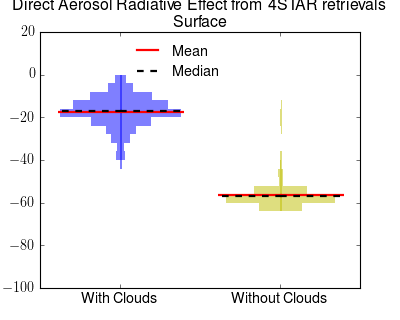

In [69]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,20],xlim=[-0.5,1.5])
ax1.set_ylabel('Direct Aerosol Radiative Effect [W/m$^2$]')
ax1.set_title('Direct Aerosol Radiative Effect from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Clouds','Without Clouds'])
DAREs = (c['star_aero_CRE']['dn'][:,0]-c['star_aero_CRE']['up'][:,0])-(c['star_noaero_CRE']['dn'][:,0]-c['star_noaero_CRE']['up'][:,0])
DAREs_clear = (c['star_aero_CRE_clear']['dn'][:,0]-c['star_aero_CRE_clear']['up'][:,0])-(c['star_noaero_CRE_clear']['dn'][:,0]-c['star_noaero_CRE_clear']['up'][:,0])
pu.plot_vert_hist(fig,ax1,DAREs,0,[-100,20],legend=True,onlyhist=False,loc=2,color='b',bins=30)
pu.plot_vert_hist(fig,ax1,DAREs_clear,1,[-100,20],legend=True,color='y',bins=30)
plt.savefig(fp+'../plot/ORACLES_DARE_surface_4STAR.png',transparent=True,dpi=600)

In [70]:
print 'Surface DARE'
print 'mean clouds: {}, no clouds: {}'.format(np.nanmean(DAREs),np.nanmean(DAREs_clear))
print 'median clouds: {}, no clouds: {}'.format(np.nanmedian(DAREs),np.nanmedian(DAREs_clear))
print 'std clouds: {}, no clouds: {}'.format(np.nanstd(DAREs),np.nanstd(DAREs_clear))

Surface DARE
mean clouds: -17.3870145784, no clouds: -56.4893934921
median clouds: -17.0328, no clouds: -57.105685
std clouds: 7.52116641462, no clouds: 5.49123351814


<IPython.core.display.Javascript object>


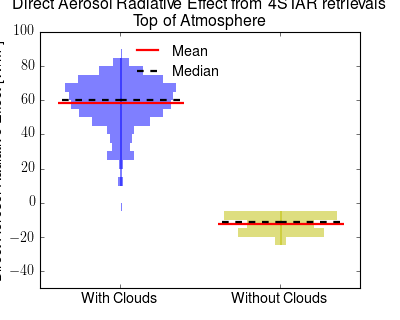

In [71]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-50,100],xlim=[-0.5,1.5])
ax1.set_ylabel('Direct Aerosol Radiative Effect [W/m$^2$]')
ax1.set_title('Direct Aerosol Radiative Effect from 4STAR retrievals\nTop of Atmosphere')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Clouds','Without Clouds'])
DAREt = (c['star_aero_CRE']['dn'][:,2]-c['star_aero_CRE']['up'][:,2])-\
       (c['star_noaero_CRE']['dn'][:,2]-c['star_noaero_CRE']['up'][:,2])
DAREt_clear = (c['star_aero_CRE_clear']['dn'][:,2]-c['star_aero_CRE_clear']['up'][:,2])-\
             (c['star_noaero_CRE_clear']['dn'][:,2]-c['star_noaero_CRE_clear']['up'][:,2])
pu.plot_vert_hist(fig,ax1,DAREt,0,[-50,100],legend=True,onlyhist=False,loc=2,color='b',bins=30)
pu.plot_vert_hist(fig,ax1,DAREt_clear,1,[-50,100],legend=True,color='y',bins=30)
plt.savefig(fp+'../plot/ORACLES_DARE_toa_4STAR.png',transparent=True,dpi=600)

In [72]:
print 'TOA DARE'
print 'mean clouds: {}, no clouds: {}'.format(np.nanmean(DAREt),np.nanmean(DAREt_clear))
print 'median clouds: {}, no clouds: {}'.format(np.nanmedian(DAREt),np.nanmedian(DAREt_clear))
print 'std clouds: {}, no clouds: {}'.format(np.nanstd(DAREt),np.nanstd(DAREt_clear))

TOA DARE
mean clouds: 58.1258777631, no clouds: -12.6388452634
median clouds: 60.3205981959, no clouds: -11.4949634139
std clouds: 14.2642682735, no clouds: 4.27571125869


### Calculate the relative forcing efficiency

In [73]:
tau_500 = 0.3689

In [74]:
rfes = DAREs/c['star_aero_CRE']['dn'][:,2]*100.0/tau_500
rfes_clear = DAREs_clear/c['star_aero_CRE']['dn'][:,2]*100.0/tau_500
rfet = DAREt/c['star_aero_CRE']['dn'][:,2]*100.0/tau_500
rfet_clear = DAREt_clear/c['star_aero_CRE']['dn'][:,2]*100.0/tau_500 

<IPython.core.display.Javascript object>


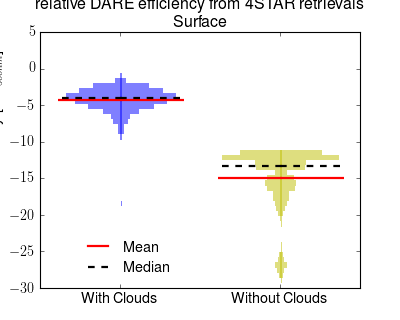

In [75]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-30,5],xlim=[-0.5,1.5])
ax1.set_ylabel('relative DARE efficiency [\%/$\\tau_{{500nm}}$]')
ax1.set_title('relative DARE efficiency from 4STAR retrievals\nSurface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Clouds','Without Clouds'])
pu.plot_vert_hist(fig,ax1,rfes,0,[-30,5],legend=True,onlyhist=False,loc=4,color='b',bins=50)
pu.plot_vert_hist(fig,ax1,rfes_clear,1,[-30,5],legend=True,color='y',bins=50)
plt.savefig(fp+'../plot/ORACLES_rDAREe_surface_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


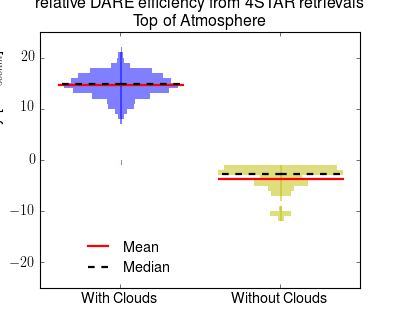

In [76]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-25,25],xlim=[-0.5,1.5])
ax1.set_ylabel('relative DARE efficiency [\%/$\\tau_{{500nm}}$]')
ax1.set_title('relative DARE efficiency from 4STAR retrievals\nTop of Atmosphere')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['With Clouds','Without Clouds'])
pu.plot_vert_hist(fig,ax1,rfet,0,[-25,25],legend=True,onlyhist=False,loc=4,color='b',bins=50)
pu.plot_vert_hist(fig,ax1,rfet_clear,1,[-25,25],legend=True,color='y',bins=50)
plt.savefig(fp+'../plot/ORACLES_rDAREe_TOA_4STAR.png',transparent=True,dpi=600)

In [77]:
print 'Surface rDAREe'
print 'mean clouds: {}, no clouds: {}'.format(np.nanmean(rfes),np.nanmean(rfes_clear))
print 'median clouds: {}, no clouds: {}'.format(np.nanmedian(rfes),np.nanmedian(rfes_clear))
print 'std clouds: {}, no clouds: {}'.format(np.nanstd(rfes),np.nanstd(rfes_clear))

Surface rDAREe
mean clouds: -4.25692700649, no clouds: -14.9656845128
median clouds: -4.07386415135, no clouds: -13.2668053669
std clouds: 1.51791778537, no clouds: 4.17894544221


In [78]:
print 'TOA rDAREe'
print 'mean clouds: {}, no clouds: {}'.format(np.nanmean(rfet),np.nanmean(rfet_clear))
print 'median clouds: {}, no clouds: {}'.format(np.nanmedian(rfet),np.nanmedian(rfet_clear))
print 'std clouds: {}, no clouds: {}'.format(np.nanstd(rfet),np.nanstd(rfet_clear))

TOA rDAREe
mean clouds: 14.6467516968, no clouds: -3.68669248005
median clouds: 14.7500256637, no clouds: -2.67401308961
std clouds: 2.36190007496, no clouds: 2.49790287116


## Calculate the impact of aerosol on CRE

<IPython.core.display.Javascript object>


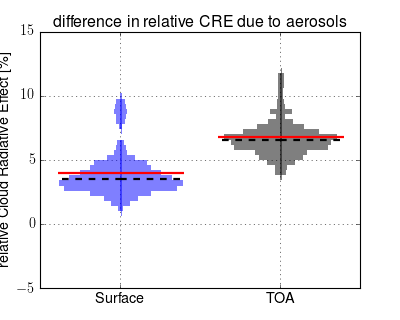

In [138]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-5,15],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('difference in relative CRE due to aerosols')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Surface','TOA'])
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,0]-star_noaero_rC[:,0],0,[-5,15],legend=True,onlyhist=True,loc=4,color='b',bins=50)
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,2]-star_noaero_rC[:,2],1,[-5,15],legend=True,color='k',bins=50)
ax1.grid()
plt.savefig(fp+'../plot/ORACLES_rCRE_from_aerosol_4STAR.png',transparent=True,dpi=600)

In [139]:
print 'difference in relative CRE due to aerosol'
print 'mean, surface: {}, toa: {}'.format(np.nanmean(star_aero_rC[:,0]-star_noaero_rC[:,0]),np.nanmean(star_aero_rC[:,2]-star_noaero_rC[:,2]))

difference in relative CRE due to aerosol
mean, surface: 3.95046055309, toa: 6.7632074748


<IPython.core.display.Javascript object>


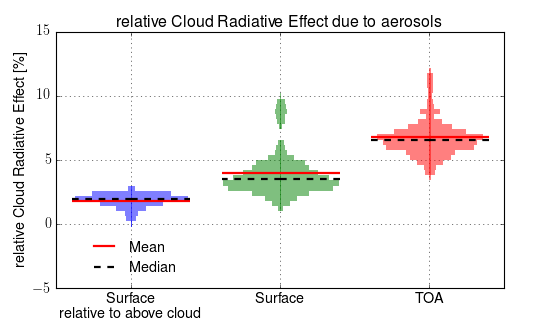

In [127]:
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-5,15],xlim=[-0.5,2.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect due to aerosols')
ax1.set_xticks([0,1,2])
ax1.set_xticklabels(['Surface\nrelative to above cloud','Surface','TOA'])
pu.plot_vert_hist(fig,ax1,star_aero_rC_abc[:,0]-star_noaero_rC_abc[:,0],0,[-5,15],legend=True,onlyhist=False,loc=4,color='b',bins=50)
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,0]-star_noaero_rC[:,0],1,[-5,15],legend=True,onlyhist=True,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star_aero_rC[:,2]-star_noaero_rC[:,2],2,[-5,15],legend=True,color='r',bins=50)
ax1.grid()
plt.savefig(fp+'../plot/ORACLES_rCRE_from_aerosol_abc_4STAR.png',transparent=True,dpi=600)

In [98]:
c.keys()

[u'star_aero_CRE',
 u'star_noaero_C',
 u'star_noaero_CRE',
 u'star_noaero_CRE_clear',
 u'star_aero_CRE_clear',
 u'star_aero_C']

In [101]:
c['star_aero_C'].shape

(4072L, 3L)

In [107]:
ar.keys()

[u'fl_alt',
 u'tau',
 u'sza',
 u'lat_fl',
 u'lat',
 u'alt',
 u'lon_fl',
 u'alt_fl',
 u'lon',
 u'tau_fl',
 u'ref',
 u'fl_ki',
 u'utc_fl',
 u'delta',
 u'phase',
 u'fl',
 u'fl_match',
 u'utc',
 u'ref_fl',
 u'days',
 u'fl_incld',
 u'ki']

In [108]:
ar['tau_fl'].shape

(4072L,)

<IPython.core.display.Javascript object>


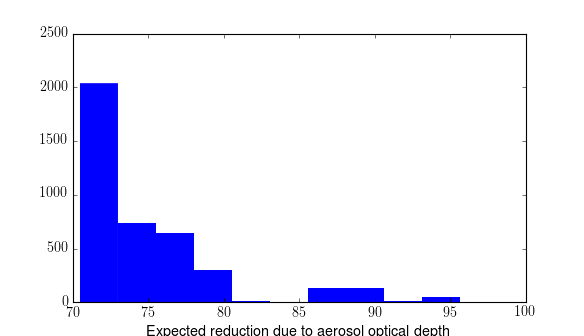

In [112]:
plt.figure()
plt.hist(np.exp(-1.0*0.36*np.cos(ar['sza'][ar['fl'].astype(bool)]*np.pi/180.0))*100.0,edgecolor='None')
plt.xlabel('Expected reduction due to aerosol optical depth')
#plt.title('TOA albedo')
#plt.savefig(fp+'../plot/ORACLES_albedo_toa_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


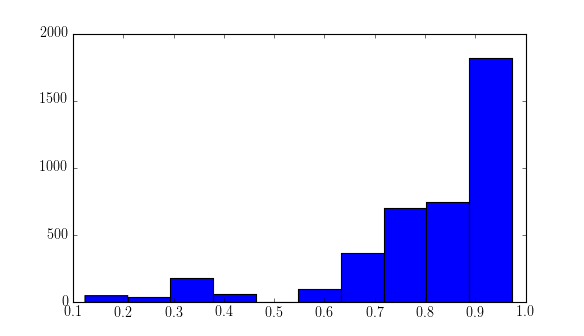

(array([   50.,    40.,   178.,    65.,     2.,   102.,   367.,   706.,
          744.,  1818.]),
 array([ 0.12385716,  0.20871939,  0.29358162,  0.37844384,  0.46330607,
         0.5481683 ,  0.63303052,  0.71789275,  0.80275498,  0.8876172 ,
         0.97247943]),
 <a list of 10 Patch objects>)

In [115]:
plt.figure()
plt.hist( np.cos(ar['sza'][ar['fl'].astype(bool)]*np.pi/180.0) )

In [117]:
np.cos(4*np.pi/180)

0.9975640502598242

In [118]:
1.0/np.cos(45.0*np.pi/180.0)

1.4142135623730949

Ratio the expected reduction due to aerosol

In [119]:
aero_tau_ratio = np.exp(-1.0*0.36*np.cos(ar['sza'][ar['fl'].astype(bool)]*np.pi/180.0))

<IPython.core.display.Javascript object>


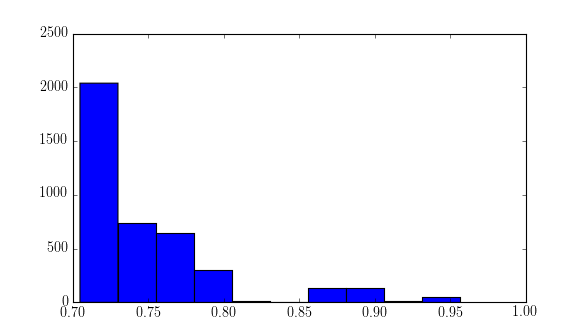

(array([ 2039.,   741.,   642.,   301.,    14.,     4.,   134.,   133.,
           14.,    50.]),
 array([ 0.70462284,  0.72979965,  0.75497645,  0.78015325,  0.80533006,
         0.83050686,  0.85568367,  0.88086047,  0.90603727,  0.93121408,
         0.95639088]),
 <a list of 10 Patch objects>)

In [123]:
plt.figure()
plt.hist(aero_tau_ratio)

In [120]:
print 'Surface CRE'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(c['star_aero_C'][:,0]),np.nanmean(c['star_noaero_C'][:,0]))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(c['star_aero_C'][:,0]),np.nanmedian(c['star_noaero_C'][:,0]))
print 'std aero: {}, no aero: {}'.format(np.nanstd(c['star_aero_C'][:,0]),np.nanstd(c['star_noaero_C'][:,0]))

Surface CRE
mean aero: -571.210240685, no aero: -610.312619598
median aero: -601.360284941, no aero: -638.132627512
std aero: 160.861793015, no aero: 162.326799866


In [122]:
print 'Surface CRE corrected for ratio'
print 'mean aero: {}, no aero: {}'.format(np.nanmean(c['star_aero_C'][:,0]),np.nanmean(c['star_noaero_C'][:,0]*aero_tau_ratio))
print 'median aero: {}, no aero: {}'.format(np.nanmedian(c['star_aero_C'][:,0]),np.nanmedian(c['star_noaero_C'][:,0]*aero_tau_ratio))
print 'std aero: {}, no aero: {}'.format(np.nanstd(c['star_aero_C'][:,0]),np.nanstd(c['star_noaero_C'][:,0]*aero_tau_ratio))


Surface CRE corrected for ratio
mean aero: -571.210240685, no aero: -450.041544857
median aero: -601.360284941, no aero: -468.177892148
std aero: 160.861793015, no aero: 106.793228586


In [125]:
-571.2/-610.3

0.9359331476323122

In [134]:
np.exp(-0.1)

0.90483741803595952